<a href="https://colab.research.google.com/github/Swarn36/Linear_Regression_Trial/blob/main/Large_scale_Wave_Energy_Farm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview

Wave energy is a rapidly advancing and promising renewable energy source that holds great potential for addressing the challenges of global warming and climate change. However, optimizing energy output in large wave farms presents a complex problem due to the expensive calculations required to account for hydrodynamic interactions between wave energy converters (WECs).

For more details, please refer to the following [link](https://dl.acm.org/doi/abs/10.1145/3377930.3390235).

The Dataset can be found [here](https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm)

##Dataset Information

For what purpose was the dataset created?

----This dataset was created to develop a fast and effective surrogate model for estimating the total power out of the large wave farm accurately.

Who funded the creation of the dataset?

----This work was supported by Phoenix HPC service at the University of Adelaide.

What do the instances in this dataset represent?

----Each instance represents the coordination of wave energy converters in a wave farm plus the total power output and individual power of each converter and q-factor.

Does the dataset contain data that might be considered sensitive in any way?

----No.

Was there any data preprocessing performed?

----No.

Has Missing Values?

----No

##Variable Information

The dataset includes 4 CSV files for 49 and 100 wave energy converters based on Perth and Sydney wave scenarios. The main goal is predicting the total power output of the wave farm based on the coordination of WECs (X1, Y1, X2, Y2,..., Xn, Yn). As the second plan, predicting the power output of each converter in the wave farm can be interesting.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df_s1 = pd.read_csv('/content/WEC_Sydney_100.csv')
df_s1.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,74018.52,71727.79,67966.45,63101.26,88826.02,86531.44,83786.68,73514.19,0.69,7247491.41
1,198.0,0.0,197.18,80.53,193.59,150.00,77.58,198.0,598.0,0.0,...,63702.46,67776.99,65133.52,63138.74,82852.91,83519.30,81973.65,71781.34,0.67,7119352.90
2,198.0,0.0,197.07,76.64,192.74,155.74,84.67,198.0,798.0,0.0,...,55788.34,59593.98,60073.60,59198.12,63377.08,72078.85,77435.62,67457.26,0.68,7148342.69
3,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,66961.48,65716.93,66637.89,62562.54,80858.08,82656.53,82171.28,71713.30,0.69,7317998.83
4,198.0,0.0,197.46,75.07,197.18,149.14,149.00,198.0,598.0,0.0,...,51814.27,59556.86,68341.92,70731.90,64192.86,69757.10,75581.40,69741.63,0.65,6925096.49


In [ ]:
df_s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 302 entries, X1 to Total_Power
dtypes: float64(302)
memory usage: 5.3 MB


In [ ]:
df_s1.shape[0]

2318

In [ ]:
df_coord = df_s1.loc[:, 'X1':'Y100']

In [ ]:
df = df_s1.drop(columns = df_coord.columns)
df.head()

,Power1,Power2,Power3,Power4,Power5,Power6,Power7,Power8,Power9,Power10,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,90499.84,79473.40,74169.82,71235.36,93005.06,82354.01,73843.68,67444.89,98145.38,87879.29,...,74018.52,71727.79,67966.45,63101.26,88826.02,86531.44,83786.68,73514.19,0.69,7247491.41
1,94385.32,84026.11,76973.29,74361.62,96530.89,87142.41,79391.11,71846.52,102502.26,95060.22,...,63702.46,67776.99,65133.52,63138.74,82852.91,83519.30,81973.65,71781.34,0.67,7119352.90
2,93502.81,84088.49,80247.12,72699.18,92397.41,80273.01,75470.32,75641.07,96136.12,83810.08,...,55788.34,59593.98,60073.60,59198.12,63377.08,72078.85,77435.62,67457.26,0.68,7148342.69
3,91820.41,80149.33,74985.67,70514.32,94945.46,85495.24,79134.77,71231.83,96884.41,85998.03,...,66961.48,65716.93,66637.89,62562.54,80858.08,82656.53,82171.28,71713.30,0.69,7317998.83
4,94110.45,84478.74,78114.63,72246.86,97172.70,89580.96,84125.38,70979.80,101297.21,95353.35,...,51814.27,59556.86,68341.92,70731.90,64192.86,69757.10,75581.40,69741.63,0.65,6925096.49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 102 entries, Power1 to Total_Power
dtypes: float64(102)
memory usage: 1.8 MB


In [ ]:
target = 'Total_Power'

<Axes: >

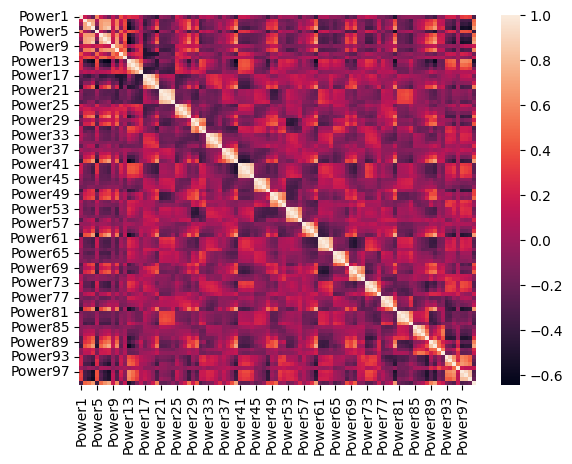

In [ ]:
corr = df.drop(columns=[target, 'qW']).corr()

sns.heatmap(corr)

There is so many power variables. Here we can do dimensionality reduction or linear regression with the Total Power as the dependent variable.

<Axes: >

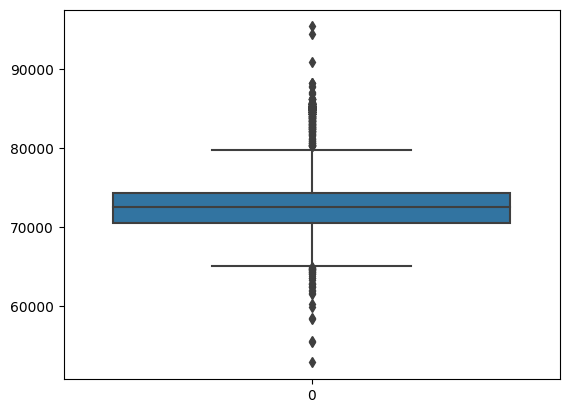

In [ ]:
sns.boxplot(df['Power100'])

<Axes: >

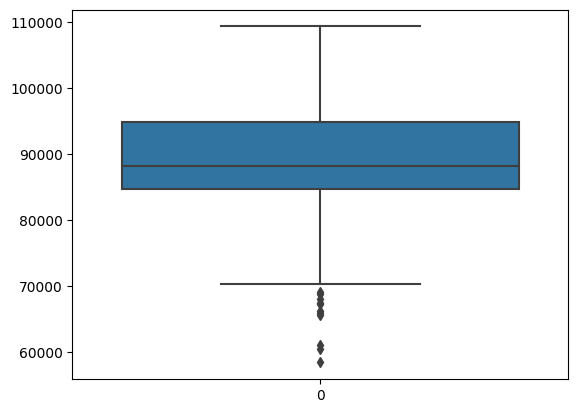

In [ ]:
sns.boxplot(df['Power10'])

<Axes: >

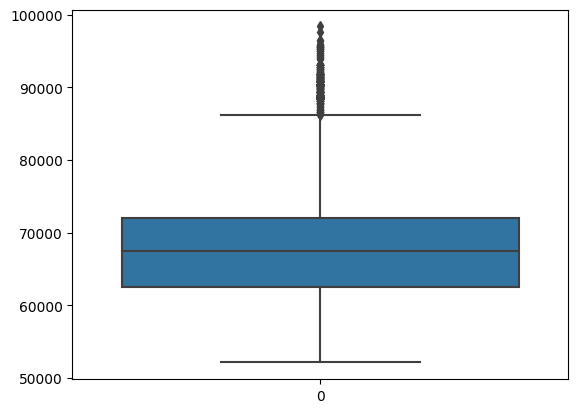

In [ ]:
sns.boxplot(df['Power35'])

Though I take random columns to check if there is any outliers in the variables, I see in each column consist some extra values. For this I will use trimmed_var for KMeans and PCA Calculation. But for now let's see how the linear regression works in this scenario.

##Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [ ]:
X_train = df.drop(columns=[target, 'qW'])
y_train = df[target]


In [ ]:
print(f'X_train shape:{X_train.shape}')
print(f'y_train shape:{y_train.shape}')

X_train shape:(2318, 100)
y_train shape:(2318,)


At first I will identify the `Baseline Error` from this dataset

In [ ]:
mean_baseline = y_train.mean()
pred_baseline = len(y_train) * [mean_baseline]

mae_baseline = mean_absolute_error(y_train, pred_baseline)
print(f'Mean absolute error in Baseline: {mae_baseline.round(2)}')

Mean absolute error in Baseline: 79528.05


Now my main target is to make the mean absolute error less from the baseline mean absolute error.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# let's find the training error

pred_train = model.predict(X_train)
mae_training = mean_absolute_error(y_train, pred_train)

print(f'pred_train shape:{pred_train.shape}')
print(f'Mean absolute error in training data: {mae_training.round(2)}')

pred_train shape:(2318,)
Mean absolute error in training data: 98.27


This value is much less than I thought. Though it should be great for the model, but it creates some doubts in the modelling dataset. Either my model is too correct or the dataset is filled with wrong values.

In [ ]:
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)

print(f'Length of coefficients: {len(coefficient)}')

Length of coefficients: 100


##Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model_r= Ridge()
model_r.fit(X_train, y_train)

Ridge()

In [ ]:
# let's find the training error

pred_train = model.predict(X_train)
mae_training = mean_absolute_error(y_train, pred_train)

print(f'pred_train shape:{pred_train.shape}')
print(f'Mean absolute error in training data: {mae_training.round(2)}')

pred_train shape:(2318,)
Mean absolute error in training data: 98.27


In [ ]:
feat_imp = pd.Series(coefficient, index = X_train.columns)
feat_imp.head()

Power1    1.00
Power2    1.00
Power3    1.00
Power4    0.99
Power5    1.00
dtype: float64

In [ ]:
print(f"Total power = {intercept}")
for f, c in feat_imp.items():
    print(f"+ ({c} * {f})")

Total power = -2413.51
+ (1.0 * Power1)
+ (1.0 * Power2)
+ (1.0 * Power3)
+ (0.99 * Power4)
+ (1.0 * Power5)
+ (1.0 * Power6)
+ (1.0 * Power7)
+ (1.0 * Power8)
+ (1.0 * Power9)
+ (1.0 * Power10)
+ (1.01 * Power11)
+ (1.0 * Power12)
+ (1.0 * Power13)
+ (1.0 * Power14)
+ (0.99 * Power15)
+ (1.01 * Power16)
+ (1.0 * Power17)
+ (1.0 * Power18)
+ (1.0 * Power19)
+ (1.0 * Power20)
+ (1.0 * Power21)
+ (1.0 * Power22)
+ (1.0 * Power23)
+ (1.0 * Power24)
+ (1.0 * Power25)
+ (1.0 * Power26)
+ (1.0 * Power27)
+ (1.0 * Power28)
+ (1.0 * Power29)
+ (1.0 * Power30)
+ (1.01 * Power31)
+ (1.0 * Power32)
+ (1.01 * Power33)
+ (0.99 * Power34)
+ (1.0 * Power35)
+ (0.99 * Power36)
+ (1.0 * Power37)
+ (1.0 * Power38)
+ (1.0 * Power39)
+ (1.0 * Power40)
+ (1.0 * Power41)
+ (0.99 * Power42)
+ (1.0 * Power43)
+ (1.0 * Power44)
+ (1.0 * Power45)
+ (1.0 * Power46)
+ (1.0 * Power47)
+ (1.01 * Power48)
+ (1.0 * Power49)
+ (1.0 * Power50)
+ (1.0 * Power51)
+ (1.0 * Power52)
+ (1.0 * Power53)
+ (1.0 * Power54)
+ (1

As it is seen that there are many variables that include outliers and again the `Ridge Regression` was tried to avoid `overfitting` issues but result came same like `Linear Regression` did. So I will try `trimmed_var` and then PCA about the dataset

##KMeans Clustering

Since there are 100 Power variables I would like to cluster the top ten variables to depict a cluster

In [ ]:
from scipy.stats.mstats import trimmed_var
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
top_ten_var = X_train.var().sort_values().tail(10)

print(f'Top ten var: {top_ten_var}')

Top ten var: Power20    1.558707e+08
Power50    1.586643e+08
Power30    1.591905e+08
Power70    1.622095e+08
Power23    1.657408e+08
Power22    1.852261e+08
Power19    1.956230e+08
Power18    2.100518e+08
Power21    2.122470e+08
Power17    2.390794e+08
dtype: float64


In [ ]:
fig = px.bar(
            top_ten_var,
            x = top_ten_var,
            y= top_ten_var.index,
            title="High Variance Features"
)

fig.update_layout(xaxis_title = 'Variance', yaxis_title='Feature')
fig.show();

In [ ]:
#Let's trim it down
top_ten_trim_var = X_train.apply(trimmed_var, limits=(0.3, 0.3)).sort_values().tail(10) #Just cropped off top 30% and the bottom 30%

print(f'Top ten trimmed var: {top_ten_trim_var}')

Top ten trimmed var: Power42    3.227605e+07
Power43    3.277632e+07
Power78    3.639889e+07
Power18    3.752039e+07
Power30    4.243397e+07
Power70    4.460393e+07
Power19    4.523394e+07
Power79    5.400735e+07
Power50    5.472228e+07
Power17    7.535086e+07
dtype: float64


In [ ]:
fig = px.bar(
            top_ten_trim_var,
            x = top_ten_trim_var,
            y= top_ten_trim_var.index,
            title="Trimmed Variance Features"
)

fig.update_layout(xaxis_title = 'Trimmed Variance', yaxis_title='Feature')
fig.show();

In [ ]:
high_var_cols = top_ten_trim_var.index.to_list()

high_var_cols

['Power42',
 'Power43',
 'Power78',
 'Power18',
 'Power30',
 'Power70',
 'Power19',
 'Power79',
 'Power50',
 'Power17']

Let's work with these 10 columns and see what will happen in the Ridge Regression way.

In [ ]:
X = X_train[high_var_cols]
X.head()

,Power42,Power43,Power78,Power18,Power30,Power70,Power19,Power79,Power50,Power17
0,67250.60,64731.04,57491.68,103003.70,74372.83,60488.25,98713.47,58430.15,81699.47,107765.85
1,97505.26,94300.29,51155.51,63656.01,64849.27,76592.95,61215.49,53776.98,90283.14,70713.56
2,74260.46,72565.81,65424.77,102186.80,90679.77,56143.24,98825.17,65144.99,60922.43,107707.85
3,89167.58,90204.59,62069.53,102873.42,92959.27,61127.73,102093.07,61170.90,65561.07,107565.36
4,70526.33,69133.89,49958.54,64813.94,60233.46,78548.27,61371.83,50234.78,56427.79,73529.68


<Axes: >

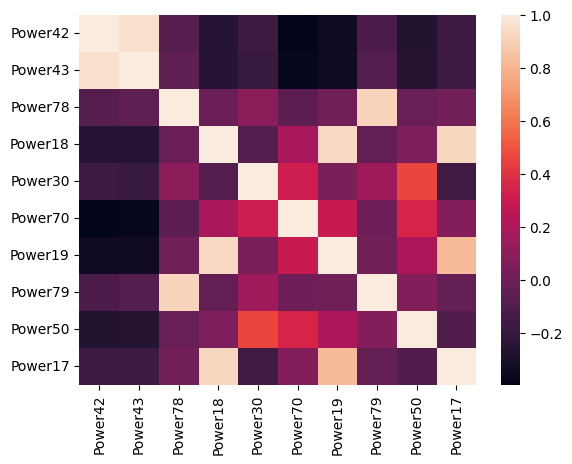

In [ ]:
corr1 = X.corr()
sns.heatmap(corr1)

At first when I work on the 100 Power variables the heatmap was seemed to be messed. So after the trimmed var I found 10 variables that I can work on. Now it will be easier to find any multicollinearity among them one by one.

---
We see there are some higher positive correlations. Let's remove them.


In [ ]:
# get the correlations between power 42 and 43
corr2= X['Power42'].corr(X['Power43'])
corr2

0.9593654247768585

These two variables will be removed.

In [ ]:
# get the correlations between power 17, 18 and 19
corr4= X[['Power17', 'Power18', 'Power19']].corr()
corr4

,Power17,Power18,Power19
Power17,1.000000,0.928421,0.825914
Power18,0.928421,1.000000,0.929225
Power19,0.825914,0.929225,1.000000


Power 18 should be removed

In [ ]:
# get the correlations between power 78 and 79
corr3= X['Power78'].corr(X['Power79'])
corr3

0.9172503846055969

these two also be removed as they will create multicollinearity

In [ ]:
X_new = X.drop(columns=['Power18', 'Power42', 'Power43', 'Power78', 'Power79'])
X_new.head()

,Power30,Power70,Power19,Power50,Power17
0,74372.83,60488.25,98713.47,81699.47,107765.85
1,64849.27,76592.95,61215.49,90283.14,70713.56
2,90679.77,56143.24,98825.17,60922.43,107707.85
3,92959.27,61127.73,102093.07,65561.07,107565.36
4,60233.46,78548.27,61371.83,56427.79,73529.68


###Second time Ridge Regression

In [ ]:
model_r= Ridge()
model_r.fit(X_new, y_train)

Ridge()

In [ ]:
#let's find the training error

pred_train = model_r.predict(X_new)
mae_training = mean_absolute_error(y_train, pred_train)

print(f'pred_train shape:{pred_train.shape}')
print(f'Mean absolute error in training data: {mae_training.round(2)}')

pred_train shape:(2318,)
Mean absolute error in training data: 69150.61


***I got Mean absolute error in Baseline: 79528.05, Now my training mean absolute error is 69150.61. That's definitely an improvement from the previous models as I cut off huge number of variables and only consider the most effective ones. Now I can make a wrangle function so that a test dataset can also be used in this model.***

## Function the model

In [102]:
# wrangle the dataset so that one can find the desired training set
def wrangle(dataset):
  """This will return X_train and y_train"""
  # converting to dataframe
  df = pd.read_csv(dataset)
  # combining the coordinating columns
  df_coord = df.loc[:, 'X1':'Y100']
  # drop the unnecessary columns
  df = df.drop(columns=df_coord)
  # set the target
  target = 'Total_Power'
  # make the training dataset
  X_train = df.drop(columns=[target, 'qW'])
  y_train = df[target]

  return X_train, y_train

In [118]:
# then for getting the baseline mean absolute error value
def baseline_mae(X_train, y_train):
  """This will show mean absolute error of baseline"""
  baseline_mean = y_train.mean()
  pred_baseline_value = [baseline_mean] * len(y_train)
  mae_baseline = mean_absolute_error(y_train, pred_baseline_value)

  print(f'Mean absolute error in baseline: {mae_baseline.round(2)}')

# then get the top ten variable through trimmed var method
def top_ten_trim_var(X_train):
  """This will create top ten variables to find the multicollinearity"""
  top_ten_trim_var = X_train.apply(trimmed_var, limits=(0.3, 0.3)).sort_values().tail(10) #Just cropped off top 30% and the bottom 30%
  high_var = top_ten_trim_var.index.to_list()
  X = X_train[high_var]

  return X

# figure out the heatmap to remove highly correlated variables
def show_heatmap(X):
  corr = X.corr()
  return sns.heatmap(corr)

# after that get the best variables to work on

# make the prediction set to test the data
def predction_mae(X_new, y_train):
  # instantiate the model
  model = Ridge()
  # fit the model
  model.fit(X_new, y_train)
  # test the data
  pred_test = model.predict(X_new)
  mae_test = mean_absolute_error(y_train, pred_test)

  print(f'Mean absolute error in test data: {mae_test.round(2)}')
  # bring out the final model
  intercept_new = model.intercept_
  coeff_new = model.coef_
  feat_imp_new = pd.Series(coeff_new, index = X_new.columns)
  feat_imp_new.head()
  print(f'Total power (in new model): {round(intercept_new, 2)}')
  for k, v in feat_imp_new.items():
    print(f'+ {round(v, 2)}*{k}')

##Model Evaluation

In [106]:
# let's test one dataset
X_train, y_train = wrangle('/content/WEC_Perth_100.csv')
baseline_mae(X_train, y_train)

Mean absolute error in baseline: 165798.3


In [107]:
X = top_ten_trim_var(X_train)

<Axes: >

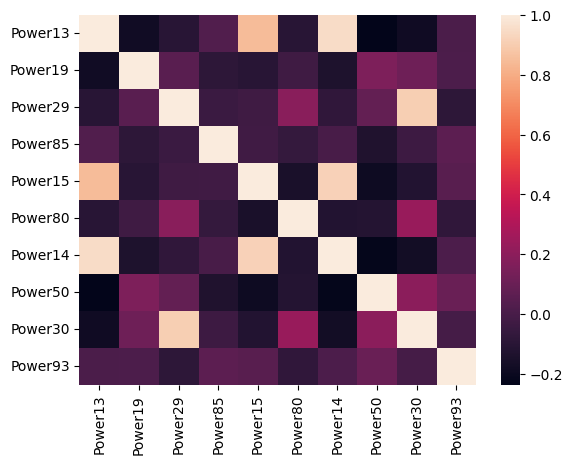

In [108]:
fig = show_heatmap(X)
fig

Now we can see what powers to remove from the new data

In [109]:
# get the correlations between power 13 and 14
corr2= X['Power13'].corr(X['Power14'])
corr2

0.9498146247855063

In [110]:
# get the correlations between power 29 and 30
corr2= X['Power29'].corr(X['Power30'])
corr2

0.9080045420097335

In [111]:
X_new1 = X.drop(columns=['Power13', 'Power14', 'Power29', 'Power30'])
X_new1.head()

,Power19,Power85,Power15,Power80,Power50,Power93
0,58281.50,74610.77,54123.75,76741.00,66421.73,98711.68
1,44067.57,98885.19,41258.24,88444.60,59893.74,96351.38
2,47852.86,74576.75,81057.47,68072.88,100206.62,96985.29
3,46370.77,74822.63,91904.76,99162.60,56134.04,76823.85
4,46984.89,74493.08,81583.61,77325.59,76886.02,98195.95


In [119]:
predction_mae(X_new1, y_train)

Mean absolute error in test data: 147469.63
Total power (in new model): 7300431.65
+ -0.22*Power19
+ -0.22*Power85
+ 4.24*Power15
+ -0.73*Power80
+ -0.28*Power50
+ -3.92*Power93


## Running Model

In [ ]:
intercept_new = model_r.intercept_
coeff_new = model_r.coef_

In [ ]:
feat_imp_new = pd.Series(coeff_new, index = X_new.columns)
feat_imp_new.head()

Power30    1.791884
Power70    0.649089
Power19    1.319090
Power50    1.887178
Power17    0.691563
dtype: float64

In [ ]:
print(f'Total power (in new model): {round(intercept_new, 2)}')
for k, v in feat_imp_new.items():
  print(f'+ {round(v, 2)}*{k}')

Total power (in new model): 6667258.66
+ 1.79*Power30
+ 0.65*Power70
+ 1.32*Power19
+ 1.89*Power50
+ 0.69*Power17


I got the final model as (Total power (in new model): 6667258.66 + 1.79xPower30 + 0.65xPower70 + 1.32xPower19 + 1.89xPower50 + 0.69xPower17)

But for fun I will progress with KMeans and PCA

In [ ]:
model_2 = KMeans(n_clusters=3, random_state=42)
model_2.fit(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [ ]:
n_clusters = range(2, 40)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for n in n_clusters:
    # build a model with pipeline
    model = make_pipeline(MinMaxScaler(), KMeans(n_clusters=n, random_state=42))
    # Train and fit the model
    model.fit(X_new)
    # get inertia values
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    #get silhouette scores
    silhouette_scores.append(silhouette_score(X_new, model.named_steps['kmeans'].labels_))

print(f'inertia :{inertia_errors}')
print()
print(f'silhouette : {silhouette_scores}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

inertia :[392.6378847597093, 259.08007889288393, 216.7378656735791, 185.37056928240753, 158.39212346814702, 137.09335475755393, 120.7559357743101, 109.61292625795264, 100.58770092894628, 92.37165503025835, 85.43636174789827, 78.81012274013551, 73.67359213481015, 69.06641593847792, 65.08402014005998, 61.11494378335452, 59.39288610460396, 54.928733413242306, 53.8245852293408, 51.248573324187824, 49.0563781365813, 48.214540915012776, 46.11618864742194, 45.395626070410444, 43.47185461639725, 42.40792300278496, 41.3842555696107, 40.26841681676882, 38.9448770135824, 38.747562806114146, 37.27294647959121, 36.814101150361864, 35.96915961518121, 34.82304399408491, 34.83981305923619, 34.39549989609676, 33.93345224701053, 32.90187542302211]

silhouette : [0.3378087228849683, 0.415319785274864, 0.3952358132251198, 0.3610794962425231, 0.3794594479878303, 0.4026484918733608, 0.4155899871014281, 0.428015751802568, 0.4375676895853315, 0.4571429955751754, 0.4680181350883917, 0.46565303486351023, 0.4754

Let's hope to see the best possible cluster numbers to model it.

In [ ]:
fig = px.line(x=n_clusters, y=inertia_errors, title='K-Means Model: Inertia vs Number of Clusters')

fig.update_layout(xaxis_title='Number of Clusters', yaxis_title='Inertia')

fig.show()

In [ ]:
fig = px.line(x=n_clusters, y=silhouette_scores, title='K-Means Model: Silhouette Score vs Number of Clusters')

fig.update_layout(xaxis_title='Number of Clusters', yaxis_title='Silhouette Score')

fig.show()

In [ ]:
new_model = make_pipeline(MinMaxScaler(), KMeans(n_clusters=3, random_state=42))
new_model.fit(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [ ]:
labels = new_model.named_steps['kmeans'].labels_

In [ ]:
xgb = X.groupby(labels).mean().astype(int)

xgb.head()

,Power42,Power43,Power78,Power18,Power30,Power70,Power19,Power79,Power50,Power17
0,78792,77617,69832,69391,79123,63842,67818,69862,70074,73312
1,73050,72168,69494,98245,74769,66805,93488,68644,67709,104892
2,62805,62442,75174,90124,95359,85299,93329,77562,88031,89684


In [ ]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode='group',
    title='Mean Power Impacts by Cluster'
)

fig.update_layout(xaxis_title='Cluster', yaxis_title='Value [$]')

fig.show()

In [ ]:
# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=['PC1', 'PC2'])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (2318, 2)


,PC1,PC2
0,-27760.906547,-11057.572519
1,43660.988723,-10339.581825
2,-21535.929165,-17191.705820
3,-16968.836470,-27150.733292
4,31604.228229,-6699.602124


In [ ]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
        data_frame=X_pca,
        x = 'PC1',
        y = 'PC2',
        color=labels,
        title='PCA Representation of Clusters'
)

fig.update_layout(xaxis_title='PC1', yaxis_title='PC2')

fig.show()